<a href="https://colab.research.google.com/github/022000FERNANDO/upsrj-keras-workspace/blob/main/CNN_DOG_IPYM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Red convulocional para dección de perros*

## Objetivo

Implementar una red convulocional que nos permita procesar imagenes para detectar a qué clase pertenecen, específicamente, necesitamos aprender a diferenciar entre perros y gatos.



1. *Cargar y preparar los datos*

Usaremos el dataset de ejemplo de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), el cual incluye 62,000 imágenes a color de 32x32 en 10 clases, con 600 imágenes por clase.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from dataclasses import dataclass

1.1. *Cargar y preparar los datos*

Usaremos el data set de ejemplo de [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html), el cual incluye 60000 imágenes a color de 32x32 en 10 clases, con 6000 imágenes por clase.

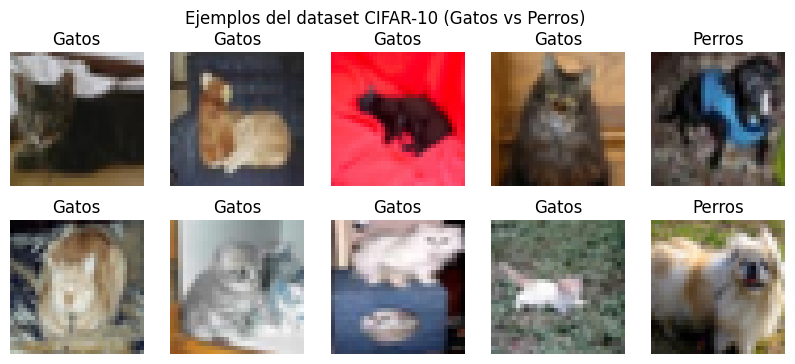

In [71]:
# cargamos base de datos de imagenes y dividimos en train data & test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# estructura de datos
@dataclass
class gatos:
  id: int = 3
  label: str = "Gatos"

@dataclass
class perros:
  id: int = 5
  label: str = "Perros"

deseado = perros
no_deseado = gatos

# clases: 3 = gato, 5 = perro
mask_train = (y_train.flatten() == gatos.id) | (y_train.flatten() == perros.id)
mask_test = (y_test.flatten() == gatos.id) | (y_test.flatten() == perros.id)

# filtramos de la base de datos las clases deseadas
x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test = x_test[mask_test], y_test[mask_test]

# normalización (0,1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# convertimos etiquetas: gato = 0, perro = 1
y_train = (y_train == deseado.id).astype(int)
y_test = (y_test == deseado.id).astype(int)

# visualización de imágenes
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i])
  ax.set_title(deseado.label if y_train[i] == 1 else no_deseado.label)
  ax.axis("off")
plt.suptitle(f"Ejemplos del dataset CIFAR-10 ({no_deseado.label} vs {deseado.label})")
plt.show()

2. **Ejecucion con DNN (poco eficiente)**

En este caso especifico no es eficiente utilizar una DNN para el analisis de nuestros datos, esto debido a que el formato de os datos es de imagenes de 32x32 RGB, lo cual se traduce a 3072 neuronas por imagen, lo cual dado el numero de entradas(50 000) nos da en totalk 153, 600, 000 neuronas necesarias.


In [72]:
# Modelo DNN (Red Neuronal Densa)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Crear modelo secuencial
model_dnn = Sequential()

# Capa de entrada (Flatten)
model_dnn.add(Flatten(input_shape=(32, 32, 3)))

# Capa oculta
model_dnn.add(Dense(128, activation="relu"))

# Capa de salida
model_dnn.add(Dense(1, activation="sigmoid"))

# Compilar red neuronal
model_dnn.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

# Entrenar modelo
history_dnn = model_dnn.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)



Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5431 - loss: 0.7676 - val_accuracy: 0.5820 - val_loss: 0.6774
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5823 - loss: 0.6735 - val_accuracy: 0.5640 - val_loss: 0.6739
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5756 - loss: 0.6773 - val_accuracy: 0.6035 - val_loss: 0.6625
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5934 - loss: 0.6607 - val_accuracy: 0.5580 - val_loss: 0.6791
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5976 - loss: 0.6611 - val_accuracy: 0.5955 - val_loss: 0.6626



3. *Ejecución con CNN*

Dado el formato de los datos de entrada mencionados anteriormente, haremos una red neuronal convolucional (CNN) para el análisis.



In [84]:
# Modelo CNN
model_cnn = Sequential()

# Input layer
model_cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
# Hidden layers
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.5))

# Output layer (corregido)
model_cnn.add(Dense(1, activation='sigmoid'))

# Compilamos CNN
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos CNN (corregido)
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, batch_size=64,
                            validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5350 - loss: 0.6894 - val_accuracy: 0.5980 - val_loss: 0.6721
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6195 - loss: 0.6537 - val_accuracy: 0.6735 - val_loss: 0.6076
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6582 - loss: 0.6169 - val_accuracy: 0.6880 - val_loss: 0.5857
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7036 - loss: 0.5738 - val_accuracy: 0.7150 - val_loss: 0.5662
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7152 - loss: 0.5598 - val_accuracy: 0.7230 - val_loss: 0.5355


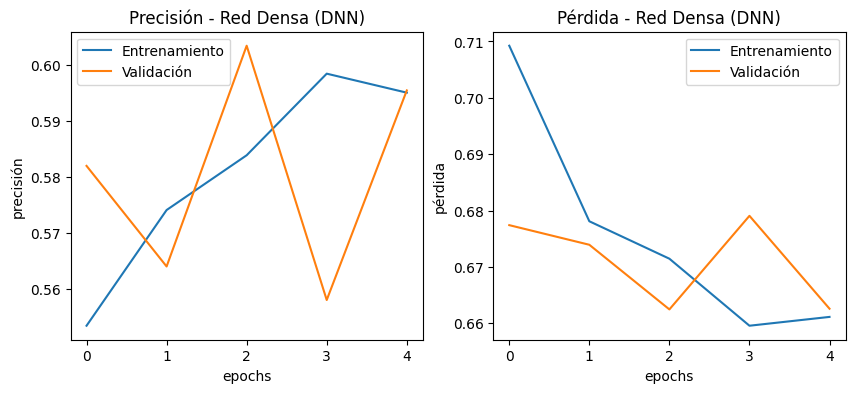

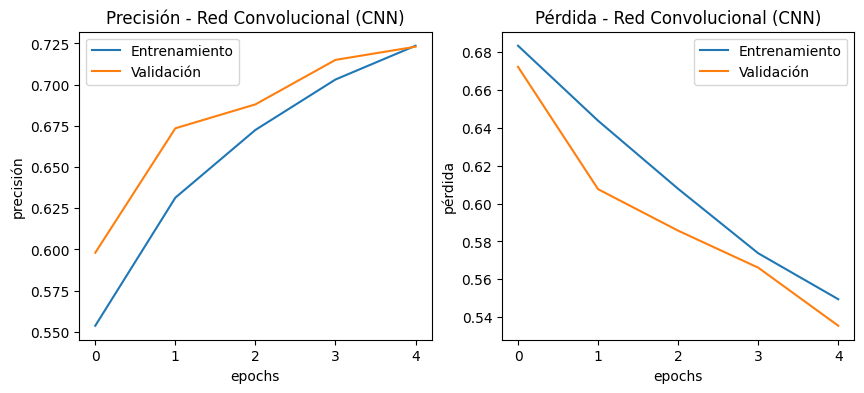

In [85]:
# graficación de precisión y pérdida de entrenamiento
def plot_history(history, title):
  plt.figure(figsize=(10,4))
  # precisión
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], label='Entrenamiento')
  plt.plot(history.history['val_accuracy'], label='Validación')
  plt.title(f'Precisión - {title}')
  plt.xlabel('epochs')
  plt.ylabel('precisión')
  plt.legend()
  # pérdida
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label='Entrenamiento')
  plt.plot(history.history['val_loss'], label='Validación')
  plt.title(f'Pérdida - {title}')
  plt.xlabel('epochs')
  plt.ylabel('pérdida')
  plt.legend()
  # despliegue de gráfico
  plt.show()

plot_history(history_dnn, 'Red Densa (DNN)')
plot_history(history_cnn, 'Red Convolucional (CNN)')

In [86]:
# Evaluar resultados
print('\nEvaluación DNN:')
model_dnn.evaluate(x_test, y_test)

print('\nEvaluación CNN:')
model_cnn.evaluate(x_test, y_test)


Evaluación DNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5481 - loss: 0.7005

Evaluación CNN:
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7125 - loss: 0.5439


[0.5355055928230286, 0.7229999899864197]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


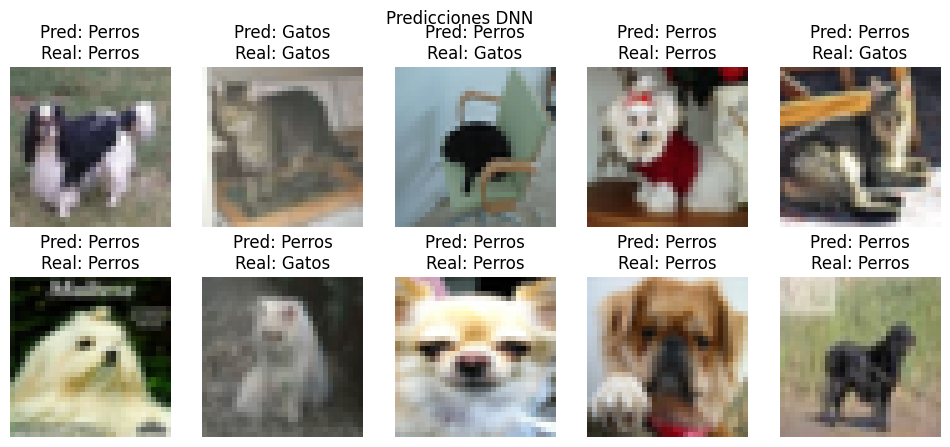

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


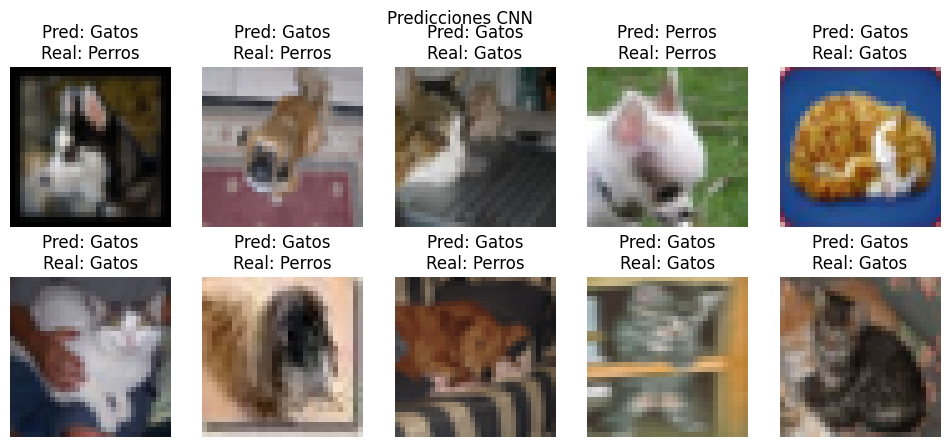

In [87]:
# visualización de algunas predicciones
def show_predictions(model, x_data, y_data, n=10, title="Predicciones"):
  idx = np.random.choice(len(x_data), n)
  preds = (model.predict(x_data[idx]) > 0.5).astype(int)
  fig, axes = plt.subplots(2, n//2, figsize=(12,5))
  for i, ax in enumerate(axes.flat):
    ax.imshow(x_data[idx[i]])
    ax.set_title(f"Pred: {deseado.label if preds[i] == 1 else no_deseado.label}\nReal: {deseado.label if y_data[idx[i]] == 1 else no_deseado.label}")
    ax.axis("off")
  plt.suptitle(title)
  plt.show()

show_predictions(model_dnn, x_test, y_test, title="Predicciones DNN")
show_predictions(model_cnn, x_test, y_test, title="Predicciones CNN")

4. *Uso de nuestra red para una imagen propia*

*Instrucciones*: Sube una fotogrfía de tu mascota y comprueba si tu perro es realmente un perro según la IA.

In [92]:
from google.colab import files
from tensorflow.keras.preprocessing import image

# subir imagen desde tu PC
uploaded = files.upload()

#Mostramos el nombre del archivo subido
for fn in uploaded.keys():
  img_path = fn
  print("Archivo cragado:", img_path)

Saving WhatsApp Image 2025-11-08 at 10.20.13 AM.jpeg to WhatsApp Image 2025-11-08 at 10.20.13 AM.jpeg
Archivo cragado: WhatsApp Image 2025-11-08 at 10.20.13 AM.jpeg


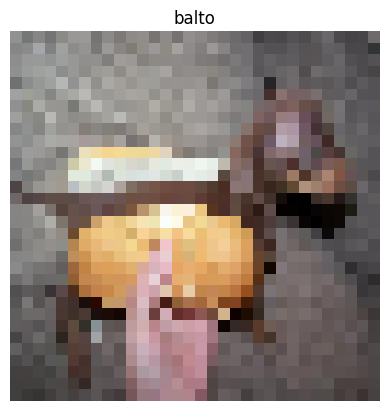

In [93]:
#cargar y preparar la imagen
img = image.load_img(img_path, target_size=(32,32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) # forma (1, 32, 32, 3)

plt.imshow(img)
plt.title("balto")
plt.axis("off")
plt.show()

In [94]:
from tensorflow.keras import layers, models

improved_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# compilamos CNN
improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# alimentamos CNN
improved_history = improved_model.fit(x_train, y_train, epochs=5, batch_size=64,
                                  validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.5758 - loss: 0.8198 - val_accuracy: 0.5000 - val_loss: 0.7182
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6541 - loss: 0.6416 - val_accuracy: 0.6210 - val_loss: 0.6531
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6957 - loss: 0.5809 - val_accuracy: 0.6855 - val_loss: 0.6170
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7389 - loss: 0.5284 - val_accuracy: 0.7375 - val_loss: 0.5440
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7582 - loss: 0.5000 - val_accuracy: 0.7350 - val_loss: 0.5102


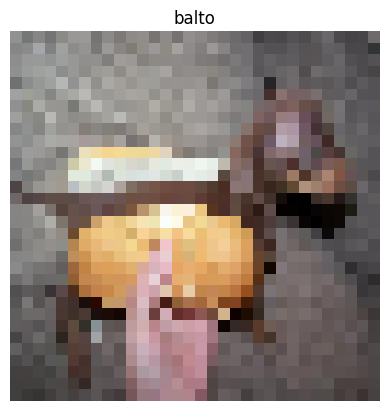

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Predicción del modelo: balto es un Gatos


In [95]:
# cargar y preparar la imagen
img = image.load_img(img_path, target_size=(32, 32))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) # forma (1, 32, 32, 3)

plt.imshow(img)
plt.title("balto")
plt.axis("off")
plt.show()

# hacer predicción
pred = improved_model.predict(img_array)[0][0]
label = f"balto es un {perros.label if pred > 0.5 else gatos.label}"
print(f"Predicción del modelo: {label}")